In [1]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

base_donnees = pd.read_csv("Donnés\BaseDeDonnesPlusComplete2021-2025.csv")
del base_donnees["sunset_hhmm"]
del base_donnees["sunrise_hhmm"]


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
base_donnees.dtypes

date                          object
max_temperature              float64
avg_hourly_temperature       float64
avg_temperature              float64
min_temperature              float64
                              ...   
min_cloud_cover_8              int64
max_cloud_cover_10           float64
avg_hourly_cloud_cover_10    float64
avg_cloud_cover_10           float64
min_cloud_cover_10           float64
Length: 70, dtype: object

<Axes: >

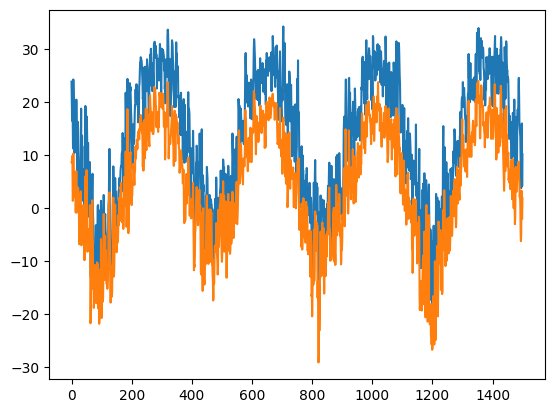

In [3]:
base_donnees['max_temperature'].plot()
base_donnees['min_temperature'].plot()

In [4]:
data = base_donnees[['date','max_temperature']]
data.dropna(inplace=True)
data.columns = ['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Temp\ipykernel_3896\4255116482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2025-05-05,23.9
1,2025-05-04,20.6
2,2025-05-03,16.5
3,2025-05-02,22.0
4,2025-05-01,16.9


In [5]:
import os

os.makedirs("lightning_logs/version_0", exist_ok=True)

model = NeuralProphet()
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.933% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\P

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (47) is too small than the required number                     for the learning rate finder (230). The results might not be optimal.

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr:  17%|█▋        | 38/230 [00:00<00:02, 80.35it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 28. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Training: |          | 0/? [14:19<?, ?it/s, v_num=6, train_loss=0.0114, reg_loss=0.000, MAE=3.690, RMSE=4.630, Loss=0.0114, RegLoss=0.000]


,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.415705,0.0,34.857437,44.005627,0.415502,0.0,0
1,0.273770,0.0,25.591967,32.444195,0.273568,0.0,1
2,0.167437,0.0,18.261385,22.745485,0.167278,0.0,2
3,0.092287,0.0,12.497835,15.360574,0.092187,0.0,3
4,0.051511,0.0,8.830377,11.069088,0.051465,0.0,4
...,...,...,...,...,...,...,...
995,0.011409,0.0,3.680636,4.635307,0.011398,0.0,995
996,0.011409,0.0,3.686388,4.640469,0.011414,0.0,996
997,0.011407,0.0,3.681697,4.618495,0.011393,0.0,997
998,0.011397,0.0,3.683495,4.635231,0.011396,0.0,998
